<a href="https://colab.research.google.com/github/tennille-bernard/Kal-Academy-Modules/blob/main/GenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install OpenAI package and import API key**

In [1]:
!pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.72.0
    Uninstalling openai-1.72.0:
      Successfully uninstalled openai-1.72.0


In [2]:
import openai

In [3]:
from google.colab import userdata
openai.api_key = userdata.get('OPENAI_GENAI_1')

Keys have a cost to them, so it's best practice to make them secret.

**Create Chatbot**

In [4]:
def chat_with_bot(prompt):
  response = openai.ChatCompletion.create(
      model="gpt-4o", #platform.openai.com
      messages=[{"role": "user", "content": prompt}]
  )
  return response.choices[0].message["content"]


#messages: an array where we specify the role (user). The message that the user gives you is the content. Content is the prompt.
#choices = if there are multiple types of responses, we want the first one (index 0)

In [5]:
chat_with_bot("You're Sherlock Holmes. Solve a mystery about a missing cake")

'Ah, the case of the missing cake—a classic conundrum. Let us apply the methods of deduction to solve this mystery.\n\n**Step 1: Gather Essential Information**\n\nFirst, we must establish the facts:\n\n1. **Location:** Where did the cake go missing? Was it a home, an office, a bakery?\n2. **Time Frame:** When was the last time the cake was seen and when was it discovered missing?\n3. **Cake Details:** What type of cake was it? Was it distinctive in some way that might make it more tempting or noteworthy?\n4. **Witnesses and Suspects:** Who was present when the cake went missing? Are there any known cake enthusiasts among them?\n5. **Motive:** Was there a special occasion? Could someone have had a reason to take the cake?\n\n**Step 2: Gather Evidence**\n\nNext, we must inspect the scene for tangible evidence:\n\n- **Crumbs or Wrappers:** Check for any remnants that might have been left behind.\n- **Footprints:** Look for any traces leading away from the scene, especially if the cake was

**Install Diffuser Transformers and Torch**  
* *Diffuser* = image generation libraries like DALL-E and Midjourney.
* *Transformers* = Developed by Hugging Face (https://huggingface.co), A transformer is a deep learning architecture that uses an attention mechanism to process sequential data.
  * Unlike traditional recurrent neural networks (RNNs), transformers can process entire sequences of data simultaneously, making them highly efficient for large datasets.
  * It provides access to a vast collection of pretrained, open-source AI models for various tasks, including NLP, computer vision, and audio.
  * Transformers are the foundation of many GenAI models, especially large language models (LLMs) like GPT, BERT, and T5. These models can be used for a wide range of generative tasks, such as:
    * Text generation: Creating new text, such as stories, articles, or code.
    * Language translation: Translating text between different languages.
    * Summarization: Condensing large amounts of text into shorter, more concise summaries.
    * Question answering: Answering questions based on provided text.
    * Image generation: Creating new images from text prompts.
    * Audio generation: Generating new audio based on text prompts or other inputs.
* *Torch* = applications such as computer vision and natural language processing.

In [6]:
!pip install diffusers transformers

In [7]:
from diffusers import StableDiffusionPipeline  # DALL-E pipeline
import torch  # gives tensors

**Test**

In [8]:
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5",
                                               torch_dtype=torch.float16).to("cuda")

#"runwayml/stable-diffusion-v1-5" loads pre-trained stablediffusion model from Hugging Face
# torch_dtype=torch.float16 tells the model to use 16 bit floating point memory to be efficient with memory use.
# .to("cuda") sends the model to a GPU (graphical processing unit) vs a CPU, allowing better processing for heavy image generation.
# for this, make sure you're running on a GPU and not a CPU.

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

**Load cool background from our prompt**

  0%|          | 0/50 [00:00<?, ?it/s]

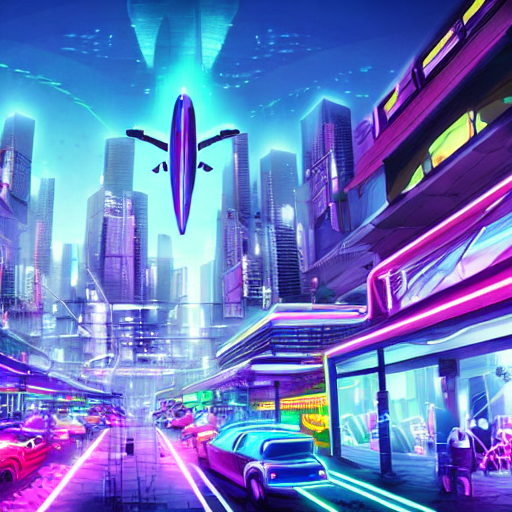

In [9]:
from IPython.display import display
prompt = "A futuristic city with flying cars and neon lights"
image = pipe(prompt).images[0]
display(image)